In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [29]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [30]:
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data['percentage'] = pd.to_numeric(data['percentage'], errors='coerce')

In [31]:
data = data[["year", "value"]].copy()
data

,year,value
0,2010,350.0
1,2010,NaN
2,2010,3.0
3,2010,7.0
4,2010,62.0
...,...,...
12649,2035,55.0
12650,2035,31.0
12651,2035,9400000.0
12652,2035,15000000.0


In [32]:
data.dropna(inplace = True)

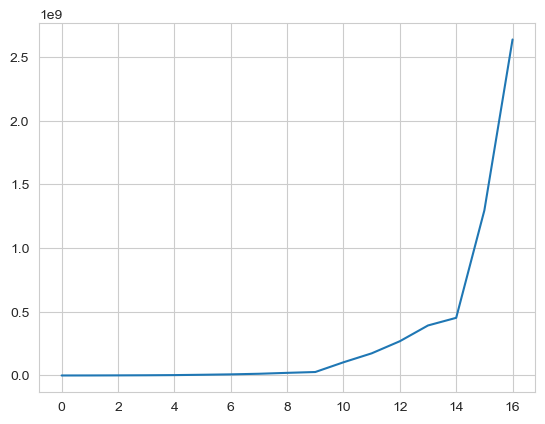

In [33]:
data_group = data.groupby("year").sum().reset_index()
plt.plot(data_group["value"])
plt.show()

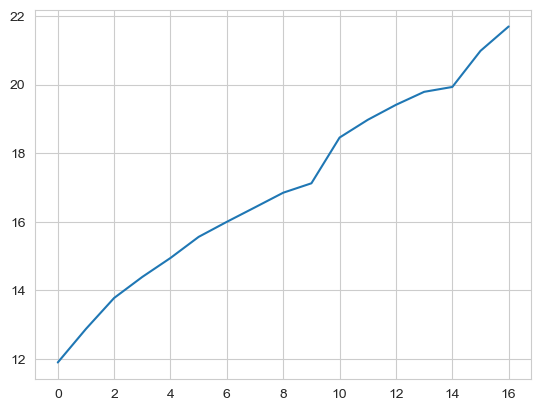

In [34]:
data_group["value"] = np.log(data_group["value"])
plt.plot(data_group["value"])
plt.show()

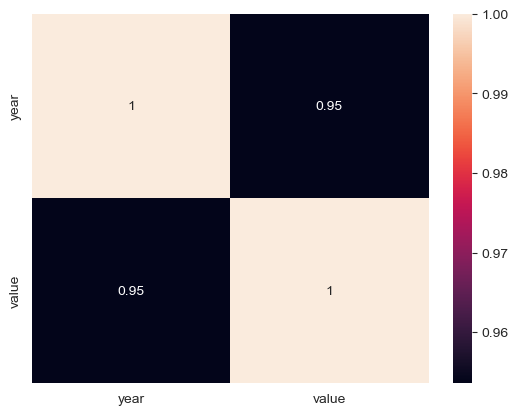

In [35]:
sns.heatmap(data_group.corr(), annot = True)
plt.show()

In [36]:
X = data_group["year"]
y = data_group["value"]
X, y

(0     2010
 1     2011
 2     2012
 3     2013
 4     2014
 5     2015
 6     2016
 7     2017
 8     2018
 9     2019
 10    2020
 11    2021
 12    2022
 13    2023
 14    2025
 15    2030
 16    2035
 Name: year, dtype: int64,
 0     11.902600
 1     12.880464
 2     13.782187
 3     14.395635
 4     14.947994
 5     15.562877
 6     16.001280
 7     16.423587
 8     16.849307
 9     17.123625
 10    18.456488
 11    18.973475
 12    19.410062
 13    19.788575
 14    19.930630
 15    20.982722
 16    21.693013
 Name: value, dtype: float64)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [39]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     88.49
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.36e-06
Time:                        11:31:41   Log-Likelihood:                -15.019
No. Observations:                  13   AIC:                             34.04
Df Residuals:                      11   BIC:                             35.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -737.9888     80.314     -9.189      0.0

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


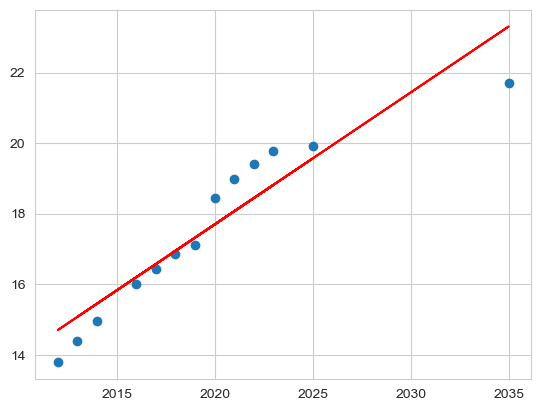

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -737.9888 + 0.3741 * X_train, 'r')
plt.show()

In [41]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

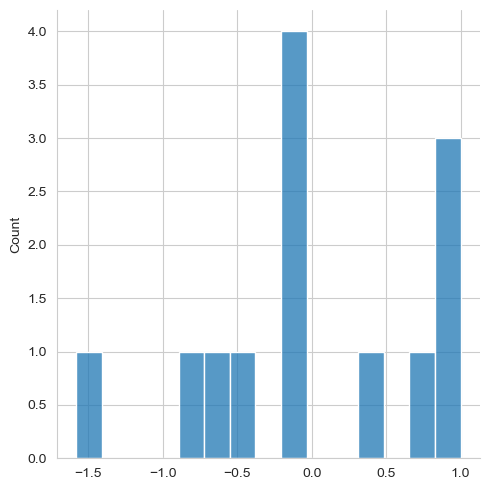

In [43]:
sns.displot(res, bins = 15)
plt.show()

In [44]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

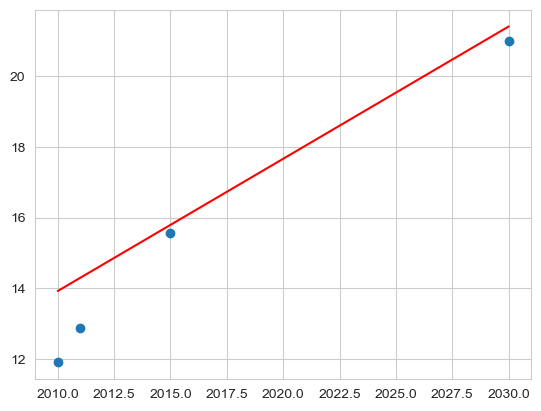

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

In [51]:
mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(1.582551129046105, 1.023631864456608, 1.2579948843481459)

In [52]:
X_test

0     2010
1     2011
5     2015
15    2030
Name: year, dtype: int64